We can try to see if the data from the club is recorded well and if we can find anything interesting in it.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [87]:
#here are all the datatypes that might be associated with emotion
types = ("EA","EL","PI","PR","PG","T1","SA","SR","SF","HR")
#the p-value for attempting to seperate the results by each datatype
results = []
#array for all the mean vectors
m_store = np.zeros((10,6))

for j in range(10):    
#dictionary of all the raw electrodermal activity for the club members
    raw = {}

    measure = types[j] # i am doing this to make it easier to change measure latter

    #note, these paths only work 
    paths = [
    r"..\Club Data\Tiffany Angry Parsed\Tiffany - Angry Emotibit Data_"+measure+".csv",
    r"..\Club Data\Ali Angry Parsed\Ali - Angry Emotibit Data_"+measure+".csv",
    r"..\Club Data\Nabil Angry Parsed\Nabil Emotibit - Angry_"+measure+".csv",
    r"..\Club Data\Tiffany Happy Parsed\Tiffany - Happy Emotibit Data_"+measure+".csv",
    r"..\Club Data\Ali Happy Parsed\Ali - Happy Emotibit Data_"+measure+".csv",
    r"..\Club Data\Nabil Happy Parsed\Nabil Emotibit - Happy_"+measure+".csv"
    ]

    for i in range(len(paths)):
        raw[i] = np.genfromtxt(paths[i], delimiter=',')

    means = []
    for i in range(len(paths)):
        means.append(np.mean(raw[i][1:,7]))

    test = ss.wilcoxon(means[0:3],means[3:])
    
    results.append(test[1])

    m_store[j] = means

print(results)

    #plt.scatter(means,np.ones(6),c=c)

[0.75, 1.0, 1.0, 1.0, 0.75, 0.75, 0.5, 0.5, 1.0, 0.25]


Text(0.5, 1.0, '0.25')

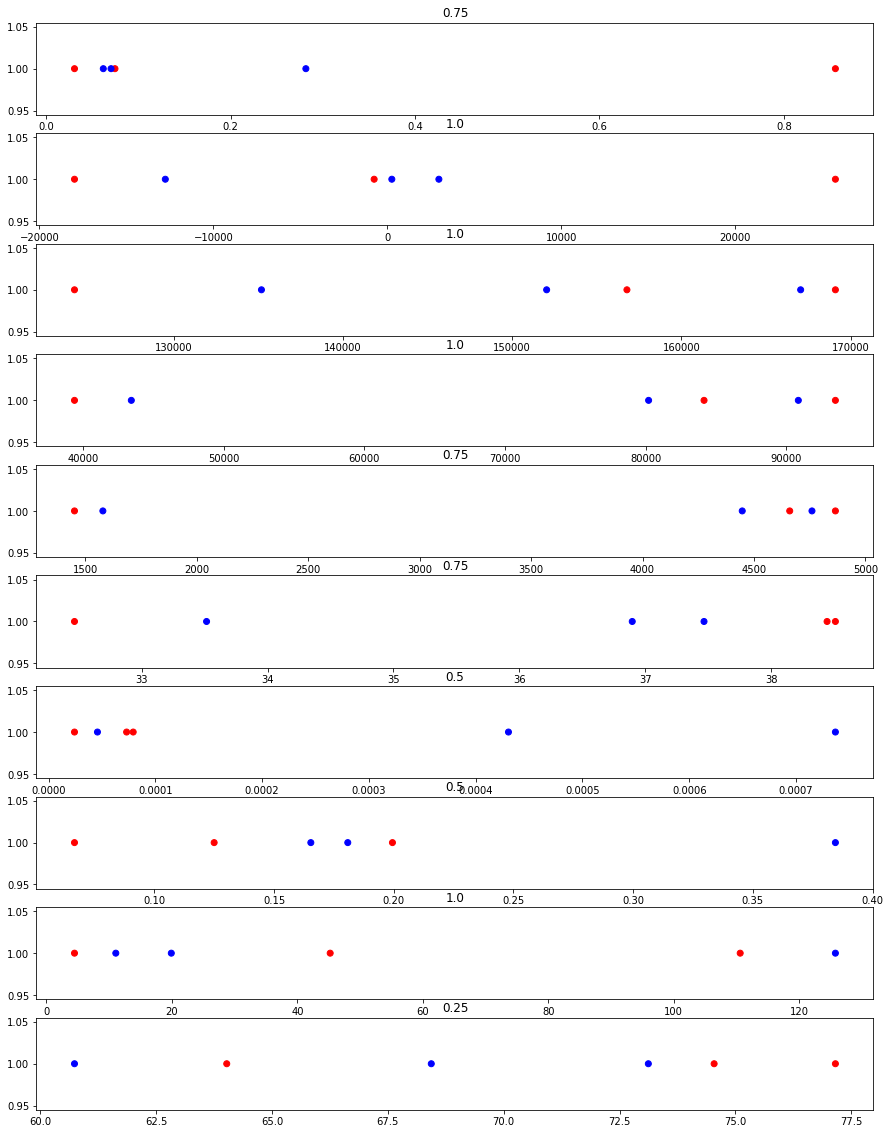

In [93]:
fig, axs = plt.subplots(10)
fig.set_figheight(20)
fig.set_figwidth(15)
axs[0].scatter(m_store[0],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[0].set_title(str(results[0]))
axs[1].scatter(m_store[1],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[1].set_title(str(results[1]))
axs[2].scatter(m_store[2],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[2].set_title(str(results[2]))
axs[3].scatter(m_store[3],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[3].set_title(str(results[3]))
axs[4].scatter(m_store[4],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[4].set_title(str(results[4]))
axs[5].scatter(m_store[5],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[5].set_title(str(results[5]))
axs[6].scatter(m_store[6],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[6].set_title(str(results[6]))
axs[7].scatter(m_store[7],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[7].set_title(str(results[7]))
axs[8].scatter(m_store[8],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[8].set_title(str(results[8]))
axs[9].scatter(m_store[9],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[9].set_title(str(results[9]))
